In [28]:
import itertools
import numpy as np
import json
from collections import defaultdict
from hog import *
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from skimage import io
from skimage import feature
from skimage import data, color, exposure
from skimage.transform import rescale, resize, downscale_local_mean

In [23]:
def hog_feature_eh(image_path):
    image = io.imread(image_path, as_gray=True)
    pixel_per_cell = min(image.shape[0]/25, image.shape[1]/25)
    # hog_feature = feature.hog(image, pixels_per_cell=(pixel_per_cell, pixel_per_cell), feature_vector='True', block_norm='L1', transform_sqrt='True')

    fd, hog_image = feature.hog(image, pixels_per_cell=(pixel_per_cell, pixel_per_cell),  block_norm='L1', transform_sqrt='True', visualize=True)
    return fd

def process_image(image_path='008963454_copy.jpg'):
	image = io.imread(image_path, as_gray=True)
	pixel_per_cell = min(image.shape[0]/25, image.shape[1]/25)
	hog_ft, hog_img = feature.hog(image, pixels_per_cell=(pixel_per_cell, pixel_per_cell), block_norm='L1', visualize='True', feature_vector='True', transform_sqrt='True')
	print(hog_ft)
	print(hog_ft.shape)
	hog_image_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 0.02))
	plt.imshow(hog_image_rescaled)
	plt.show()

In [31]:
image_files_yuh = ["resized_images/000041029_resized.png",
"resized_images/000050999_resized.png",
"resized_images/000055418_resized.png",
"resized_images/000059794_resized.png",
"resized_images/000061164_resized.png",
"resized_images/000065339_resized.png",
"resized_images/000071686_resized.png",
"resized_images/000078951_resized.png",
"resized_images/000085370_resized.png",
"resized_images/000090584_resized.png",
"resized_images/000094304_resized.png",
"resized_images/000094342_resized.png",
"resized_images/000099186_resized.png",
"resized_images/000099899_resized.png",
"resized_images/000109154_resized.png",
"resized_images/000111209_resized.png",
"resized_images/000114595_resized.png",
"resized_images/000120361_resized.png",
"resized_images/000124344_resized.png",
"resized_images/000128443_resized.png",
"resized_images/000131987_resized.png",
"resized_images/000133364_resized.png",
"resized_images/000135363_resized.png",
"resized_images/000141822_resized.png",
"resized_images/000142573_resized.png",
"resized_images/000142834_resized.png",
"resized_images/000144722_resized.png",
"resized_images/000147382_resized.png",
"resized_images/000156511_resized.png",
"resized_images/000165249_resized.png",
"resized_images/000170503_resized.png",
"resized_images/000172482_resized.png",
"resized_images/000187274_resized.png",
"resized_images/000199214_resized.png",
"resized_images/000208064_resized.png",
"resized_images/000208151_resized.png",
"resized_images/000214092_resized.png",
"resized_images/000234747_resized.png",
"resized_images/000245459_resized.png",
"resized_images/000249545_resized.png",
"resized_images/000252176_resized.png",
"resized_images/000252755_resized.png",
"resized_images/000263216_resized.png",
"resized_images/000267099_resized.png",
"resized_images/000272874_resized.png",
"resized_images/000275100_resized.png",
"resized_images/000298013_resized.png",
"resized_images/000302087_resized.png",
"resized_images/000312165_resized.png",
"resized_images/000316731_resized.png",
"resized_images/000321826_resized.png",
"resized_images/000324793_resized.png",
"resized_images/000336238_resized.png",
"resized_images/000337885_resized.png",
"resized_images/000338399_resized.png",
"resized_images/000338785_resized.png",
"resized_images/000346846_resized.png",
"resized_images/000350466_resized.png",
"resized_images/000351085_resized.png",
"resized_images/000354899_resized.png",
"resized_images/000360424_resized.png",
"resized_images/000361586_resized.png",
"resized_images/000364670_resized.png",
"resized_images/000365631_resized.png",
"resized_images/000371966_resized.png",
"resized_images/000374509_resized.png",
"resized_images/000377819_resized.png",
"resized_images/000381992_resized.png",
"resized_images/000383029_resized.png",
"resized_images/000391837_resized.png",
"resized_images/000392606_resized.png",
"resized_images/000392932_resized.png",
"resized_images/000402528_resized.png",
"resized_images/000406059_resized.png",
"resized_images/000410145_resized.png",
"resized_images/000412715_resized.png",
"resized_images/000418744_resized.png",
"resized_images/000419716_resized.png",
"resized_images/000428176_resized.png",
"resized_images/000435958_resized.png",
"resized_images/000436327_resized.png",
"resized_images/000437064_resized.png",
"resized_images/000437368_resized.png",
"resized_images/000437398_resized.png",
"resized_images/000440161_resized.png",
"resized_images/000448169_resized.png",
"resized_images/000460055_resized.png",
"resized_images/000460994_resized.png",
"resized_images/000463202_resized.png",
"resized_images/000464448_resized.png",
"resized_images/000479982_resized.png",
"resized_images/000493998_resized.png",
"resized_images/000502550_resized.png",
"resized_images/000506158_resized.png",
"resized_images/000506711_resized.png",
"resized_images/000521252_resized.png",
"resized_images/000522961_resized.png",
"resized_images/000531348_resized.png"]

In [32]:
image_files = ["resized_images/000001163_resized.png",
"resized_images/000003072_resized.png",
"resized_images/000004812_resized.png",
"resized_images/000005283_resized.png",
"resized_images/000013469_resized.png",
"resized_images/000015774_resized.png",
"resized_images/000022704_resized.png",
"resized_images/000024087_resized.png",
"resized_images/000024100_resized.png",
"resized_images/000024293_resized.png",
"resized_images/000025245_resized.png",
"resized_images/000030708_resized.png",
"resized_images/000030973_resized.png",
"resized_images/000033016_resized.png",
"resized_images/000040154_resized.png"]

for image in image_files_yuh:
    print(hog_feature_eh(image).shape)

(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)
(74844,)


In [14]:
def filter_for_single_person_data(data_filepath, save_to_filepath):
    with open(data_filepath, 'r') as file:
        loaded_data = json.load(file)
    
    image_to_data = defaultdict(list)
    for data in loaded_data:
        image_to_data[data["image"]].append(data)

    single_person_images = {key: data[0] for key, data in image_to_data.items() if len(data) == 1}

    single_person_json = [data for data in loaded_data if data["image"] in single_person_images.keys()]
    

    with open(save_to_filepath, 'w') as write_to:
        json.dump(single_person_json, write_to)
    print(f"Filtered data saved to {save_to_filepath}")

    return single_person_images

In [146]:
def preprocess_data(data_file, num_images=None):
    X = []
    y = []
    images = []

    # Load training dataset
    with open(data_file, "r") as read_file:
        train_images = json.load(read_file)
    if num_images is not None:
        train_images = train_images[:num_images]
    for image_obj in train_images:
        X.append(hog_feature("images/" + image_obj["image"]))
        y.append(np.ravel(image_obj["joints"]))
        images.append("images/" + image_obj["image"])
    X = np.column_stack((itertools.zip_longest(*X, fillvalue=0)))
    # X = np.asarray(X)
    y = np.asarray(y)

    return X, y, images

In [127]:
# num_features = 106191
num_features = 74844

In [128]:
def load_data():
    X_train = np.load("tf_data/train_X.npy")
    y_train = np.load("tf_data/train_y.npy")
    X_val = np.load("tf_data/valid_X.npy")
    y_val = np.load("tf_data/valid_y.npy")
    X_test = np.load("tf_data/test_X.npy")
    y_test = np.load("tf_data/test_y.npy")
    return X_train, y_train, X_val, y_val, X_test, y_test

In [121]:
def create_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='tanh', input_shape=(input_shape,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32)  # Output layer for 8 coordinates (2D)
    ])

    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)  # Adjusted learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [6]:
def train_and_evaluate(epochs, batch_size):
    X_train, y_train, X_val, y_val, X_test, y_test = load_data()
    input_shape = X_train.shape[1]
    model = create_model(input_shape)

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

    # Evaluate the model on the test set
    loss = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)

    return model

In [ ]:
trained_model = train_and_evaluate(100, 128)

In [123]:
alt_trained_model = train_and_evaluate(50, 32)

Epoch 1/50
258/258 [==============================] - 9s 34ms/step - loss: 292280.3125 - val_loss: 266312.2188
Epoch 2/50
258/258 [==============================] - 7s 29ms/step - loss: 132553.5312 - val_loss: 94640.1016
Epoch 3/50
258/258 [==============================] - 7s 27ms/step - loss: 77667.9219 - val_loss: 75450.9062
Epoch 4/50
258/258 [==============================] - 7s 29ms/step - loss: 69000.4922 - val_loss: 69742.3750
Epoch 5/50
258/258 [==============================] - 7s 28ms/step - loss: 66441.5000 - val_loss: 68788.5000
Epoch 6/50
258/258 [==============================] - 7s 28ms/step - loss: 65409.7031 - val_loss: 70491.2578
Epoch 7/50
258/258 [==============================] - 7s 28ms/step - loss: 62655.9766 - val_loss: 70024.8828
Epoch 8/50
258/258 [==============================] - 7s 28ms/step - loss: 61647.5898 - val_loss: 68358.2656
Epoch 9/50
258/258 [==============================] - 8s 31ms/step - loss: 61070.3008 - val_loss: 68179.1484
Epoch 10/50
258/

In [129]:
new_hog = train_and_evaluate(50, 32)

Epoch 1/50
258/258 [==============================] - 9s 34ms/step - loss: 291871.6250 - val_loss: 266416.4062
Epoch 2/50
258/258 [==============================] - 6s 23ms/step - loss: 125559.2500 - val_loss: 88564.7578
Epoch 3/50
258/258 [==============================] - 5s 21ms/step - loss: 90029.9141 - val_loss: 84331.1094
Epoch 4/50
258/258 [==============================] - 5s 21ms/step - loss: 88935.1250 - val_loss: 84067.0703
Epoch 5/50
258/258 [==============================] - 7s 25ms/step - loss: 88207.4375 - val_loss: 83453.0156
Epoch 6/50
258/258 [==============================] - 5s 21ms/step - loss: 88076.9844 - val_loss: 84199.2500
Epoch 7/50
258/258 [==============================] - 6s 24ms/step - loss: 85743.6016 - val_loss: 83775.5469
Epoch 8/50
258/258 [==============================] - 7s 26ms/step - loss: 81344.8125 - val_loss: 81893.7500
Epoch 9/50
258/258 [==============================] - 6s 23ms/step - loss: 73410.2344 - val_loss: 69838.7188
Epoch 10/50
258/

In [147]:
# Load in separate test image
X, y, images = preprocess_data("filtered_data/single_person_valid.json", 100)

In [152]:

# X_mod = np.pad(X, ((0, 0), (0, num_features - X.shape[1])), mode='constant', constant_values=0)
X_mod = X[:,:num_features]
# X.shape
# X_mod = tf.convert_to_tensor(X, dtype=tf.float32)

In [153]:
# y_est = trained_model.predict(X)
# y_est = alt_trained_model.predict(X)
y_est = new_hog.predict(X_mod)

4/4 [==============================] - 0s 6ms/step


In [107]:
def skeleton_lines(joints, color):
    plt.plot(np.append(joints[:3, 0], [joints[6, 0]]), np.append(joints[:3, 1], [joints[6, 1]]), color=color)  # Right leg
    plt.plot(np.append([joints[6, 0]], joints[3:6, 0]), np.append([joints[6, 1]], joints[3:6, 1]), color=color)  # Left leg
    plt.plot(joints[6:10, 0], joints[6:10, 1], color=color)
    plt.plot(np.append(joints[10:13, 0], [joints[7, 0]]), np.append(joints[10:13, 1], [joints[7, 1]]), color=color)  # Right arm
    plt.plot(np.append([joints[7, 0]], joints[13:, 0]), np.append([joints[7, 1]], joints[13:, 1]), color=color)  # Left arm

In [113]:
imgs = np.asarray(images)
assert len(np.unique(imgs)) == len(imgs)

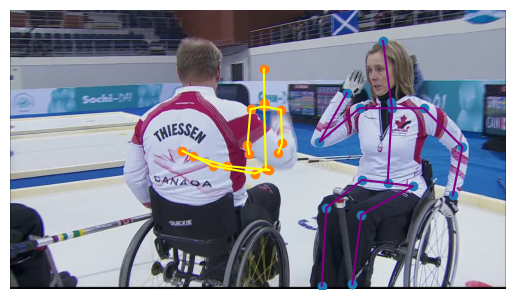

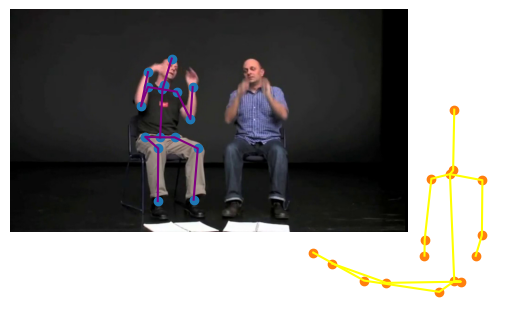

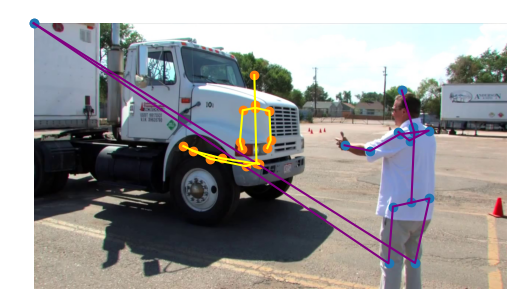

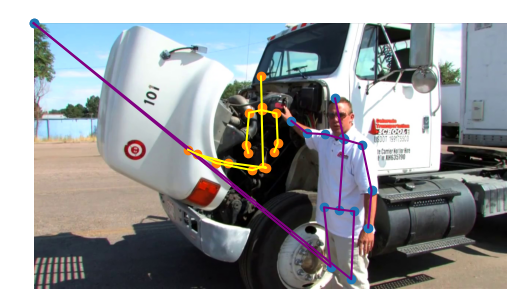

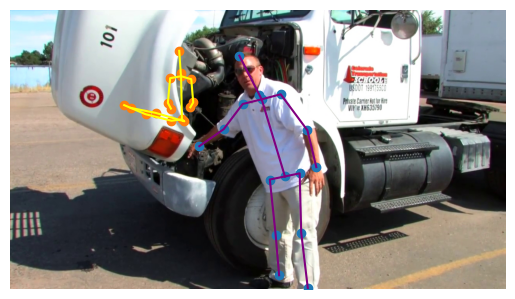

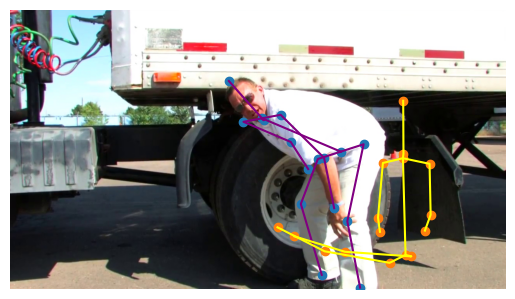

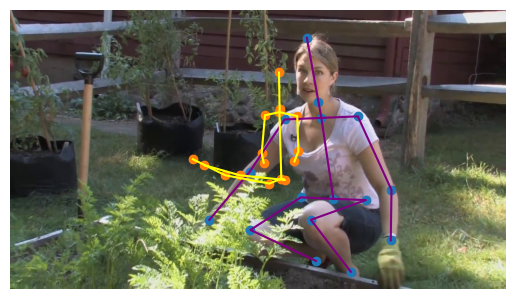

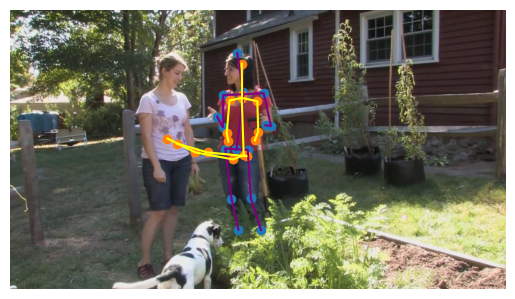

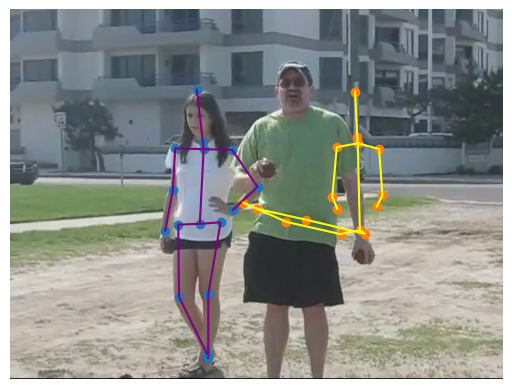

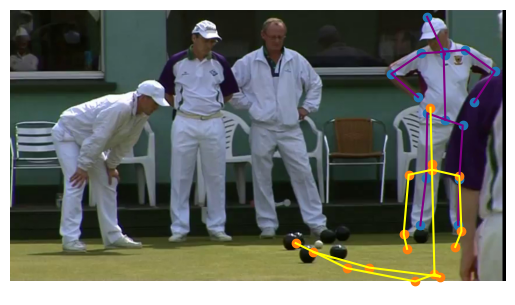

In [154]:
img_count = 10
for img_y, img_y_est, image_path in zip(y[:img_count], y_est[:img_count], images[:img_count]):
    true_points = img_y.reshape((16, 2))
    est_points = img_y_est.reshape((16, 2))

    image = io.imread(image_path)

    # Display the image using Matplotlib
    plt.imshow(image)
    plt.scatter(true_points[:, 0], true_points[:, 1])
    plt.scatter(est_points[:, 0], est_points[:, 1])
    skeleton_lines(true_points, "purple")
    skeleton_lines(est_points, "yellow")
    # plt.title('Your Image Title')
    plt.axis('off')  # Turn off axis labels
    plt.show()